<h3>Step1: retrieve data </h3>

In [18]:
import pandas as pd
import time
import datetime
from pytrends.request import TrendReq
from time import sleep
import random

pandas as pd: Imports the pandas library for data manipulation and analysis.

time: Imports the time module to work with time-related functions.

datetime: Imports the datetime module to work with date and time.

TrendReq from pytrends.request: Imports the TrendReq class from 
the pytrends library to fetch Google Trends data.

In [19]:
def date_to_timestamp(year, month, day, hour, minute):
    return int(time.mktime(datetime.datetime(year, month, day, hour, minute).timetuple()))

These utility functions are essential for generating timestamps. It converts a given date and time into a Unix timestamp.

Parameters: year, month, day, hour, minute.

Returns: An integer representing the Unix timestamp of the given date and time

It generates a timestamp string in the format YYYYMMDD_HHMMSS, which is required for querying data from Yahoo Finance.

In [20]:
def fetch_trends(keywords, timeframe='2010-01-01 2024-03-10', geo='US', category=0):
    pytrends = TrendReq(hl='en-US', tz=360)
    retries = 5
    while retries > 0:
        try:
            pytrends.build_payload(kw_list=keywords, timeframe=timeframe, geo=geo, cat=category)
            df = pytrends.interest_over_time()
            if not df.empty:
                df = df.drop(columns=['isPartial'], errors='ignore')
                df.reset_index(inplace=True)
                df['date'] = pd.to_datetime(df['date']).dt.date
            return df
        except Exception as e:
            retries -= 1
            if retries > 0:
                print(f'Retrying due to error: {e}. Retries left: {retries}')
                sleep(random.uniform(1, 3))  # Sleep for a random period between 1 and 3 seconds
            else:
                print(f'Failed to fetch trends for keywords {keywords} after multiple retries. Error: {e}')
                return pd.DataFrame()

This function, fetch_trends, uses the pytrends library to retrieve Google Trends data for the given keywords over a specified timeframe. The function sets up the request, fetches the interest over time, cleans the data by removing incomplete indicators, and standardizes the date format to match the stock data. This ensures that the data is ready for analysis and comparison with stock prices.

Parameters:

keywords: List of keywords to search in Google Trends.

timeframe: The time period for which to fetch the trends data.

geo: The geographical location for the trends data.

category: The category for the trends data.

Returns: 

A DataFrame containing the trends data for the specified 
keywords.

Process:
Initializes a TrendReq object.

Builds the payload with the given keywords, timeframe, geo, and category.

Fetches the trends data and processes it (drops the 'isPartial' column, resets the index, and converts the date column to the proper format).

In [21]:
def main():
    tickers = [
        "AAPL", "ADI", "ADSK", "AMAT", "AMD", "ANSS", "ASML", "AVGO", "CDW", "CRWD",
        "CTSH", "DASH", "DDOG", "GFS", "GOOG", "GOOGL", "INTU", "KLAC", "LRCX", "MDB",
        "META", "MSFT", "MU", "NVDA", "NXPI", "ON", "PANW", "PDD", "QCOM", "TXN"
    ]
    
    keywords_mapping = {
        "AAPL": ["Apple Inc", "AAPL", "Apple stock", "Apple company", "Apple shares"],
        "ADI": ["Analog Devices", "ADI", "ADI earnings", "Analog Devices Inc", "ADI shares"],
        "ADSK": ["Autodesk", "ADSK", "Autodesk stock", "Autodesk Inc", "Autodesk shares"],
        "AMAT": ["Applied Materials", "AMAT", "Applied Materials stock", "Applied Materials earnings", "Applied Materials Inc"],
        "AMD": ["Advanced Micro Devices", "AMD", "AMD stock", "AMD news", "AMD earnings"],
        "ANSS": ["ANSYS", "ANSS", "ANSYS stock", "ANSYS Inc", "ANSYS shares"],
        "ASML": ["ASML Holding", "ASML", "ASML stock", "ASML news", "ASML earnings"],
        "AVGO": ["Broadcom", "AVGO", "Broadcom stock", "Broadcom news", "Broadcom earnings"],
        "CDW": ["CDW Corp", "CDW", "CDW stock", "CDW news", "CDW earnings"],
        "CRWD": ["CrowdStrike", "CRWD", "CrowdStrike stock", "CrowdStrike news", "CrowdStrike earnings"],
        "CTSH": ["Cognizant", "CTSH", "Cognizant stock", "Cognizant news", "Cognizant earnings"],
        "DASH": ["DoorDash", "DASH", "DoorDash stock", "DoorDash news", "DoorDash earnings"],
        "DDOG": ["Datadog", "DDOG", "Datadog stock", "Datadog news", "Datadog earnings"],
        "GFS": ["GlobalFoundries", "GFS", "GlobalFoundries stock", "GlobalFoundries Inc", "GlobalFoundries shares"],
        "GOOG": ["Google", "GOOG", "Google stock", "Google news", "Google earnings"],
        "GOOGL": ["Alphabet", "GOOGL", "Alphabet news", "Alphabet earnings", "Alphabet forecast"],
        "INTU": ["Intuit", "INTU", "Intuit stock", "Intuit news", "Intuit earnings"],
        "KLAC": ["KLA Corporation", "KLAC", "KLA Corp stock", "KLA Corporation Inc", "KLA Corp shares"],
        "LRCX": ["Lam Research", "LRCX", "Lam Research stock", "Lam Research news", "Lam Research earnings"],
        "MDB": ["MongoDB", "MDB", "MongoDB stock", "MongoDB news", "MongoDB earnings"],
        "META": ["Meta Platforms", "META", "Meta news", "Meta earnings", "Meta forecast"],
        "MSFT": ["Microsoft", "MSFT", "Microsoft stock", "Microsoft news", "Microsoft earnings"],
        "MU": ["Micron Technology", "MU", "Micron stock", "Micron news", "Micron earnings"],
        "NVDA": ["NVIDIA", "NVDA", "NVIDIA stock", "NVIDIA news", "NVIDIA earnings"],
        "NXPI": ["NXP Semiconductors", "NXPI", "NXP stock", "NXP news", "NXP earnings"],
        "ON": ["ON Semiconductor", "ON", "ON stock", "ON news", "ON earnings"],
        "PANW": ["Palo Alto Networks", "PANW", "Palo Alto Networks stock", "Palo Alto Networks news", "Palo Alto Networks earnings"],
        "PDD": ["Pinduoduo", "PDD", "Pinduoduo stock", "Pinduoduo news", "Pinduoduo earnings"],
        "QCOM": ["Qualcomm", "QCOM", "Qualcomm stock", "Qualcomm news", "Qualcomm earnings"],
        "TXN": ["Texas Instruments", "TXN", "Texas Instruments stock", "Texas Instruments news", "Texas Instruments earnings"]
    }

    interval = '1mo'
    period1 = date_to_timestamp(2010, 1, 1, 23, 59)
    period2 = date_to_timestamp(2024, 3, 10, 23, 59)
    timeframe = f'{datetime.date.fromtimestamp(period1)} {datetime.date.fromtimestamp(period2)}'

    with pd.ExcelWriter('stock_data.xlsx', engine='openpyxl') as xlwriter:
        for ticker in tickers:
            print(f'Processing {ticker}')
            try:
                query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history'
                stock_df = pd.read_csv(query_string)
                stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

                keywords = keywords_mapping[ticker]
                trend_dfs = [fetch_trends([kw], timeframe) for kw in keywords]
                trend_dfs = [df for df in trend_dfs if not df.empty and 'date' in df.columns]
                
                if trend_dfs:
                    combined_trend_df = trend_dfs[0]
                    for df in trend_dfs[1:]:
                        combined_trend_df = combined_trend_df.merge(df, on='date', suffixes=(False, False))

                    for i, kw in enumerate(keywords):
                        combined_trend_df = combined_trend_df.rename(columns={kw: f"{kw}_index"})

                    combined_trend_df['total_index'] = combined_trend_df[[f"{kw}_index" for kw in keywords]].sum(axis=1)
                    combined_trend_df['index_change'] = combined_trend_df['total_index'].diff()
                    stock_df['Price_Change'] = stock_df['Close'].diff()

                    combined_df = pd.merge(stock_df, combined_trend_df, how='left', left_on='Date', right_on='date')
                    combined_df.to_excel(xlwriter, sheet_name=f'{ticker}_combined', index=False)
                else:
                    print(f'No valid trend data for {ticker}')
            except Exception as e:
                print(f'Error processing {ticker}: {e}')

if __name__ == "__main__":
    main()

Processing AAPL
Processing ADI
Processing ADSK
Error processing ADSK: "['Autodesk shares_index'] not in index"
Processing AMAT
Processing AMD
Processing ANSS
Error processing ANSS: "['ANSYS shares_index'] not in index"
Processing ASML
Processing AVGO
Processing CDW
Processing CRWD
Processing CTSH
Processing DASH
Processing DDOG
Processing GFS
Processing GOOG
Processing GOOGL
Processing INTU
Processing KLAC
Error processing KLAC: "['KLA Corp shares_index'] not in index"
Processing LRCX
Processing MDB
Processing META
Processing MSFT
Processing MU
Processing NVDA
Processing NXPI
Processing ON
Processing PANW
Processing PDD
Processing QCOM
Processing TXN


The main function begins by defining a list of tech company stock tickers and a mapping of those tickers to five relevant keywords for fetching Google Trends data. The function also defines the time interval for the stock data and calculates the start and end timestamps for querying historical data. This setup ensures that both stock data and Google Trends data are retrieved for the same time period.

Initialization:

tickers: A list of stock tickers for which to fetch data.

keywords_mapping: A dictionary mapping each ticker to a list of relevant keywords for Google Trends.

Variables:

interval: The interval for fetching stock prices (set to '1mo' for monthly data).

period1 and period2: Unix timestamps representing the start and end dates for fetching stock prices.

timeframe: A string representing the timeframe for fetching Google Trends data

<h3>Step2: Recognize trend</h3>

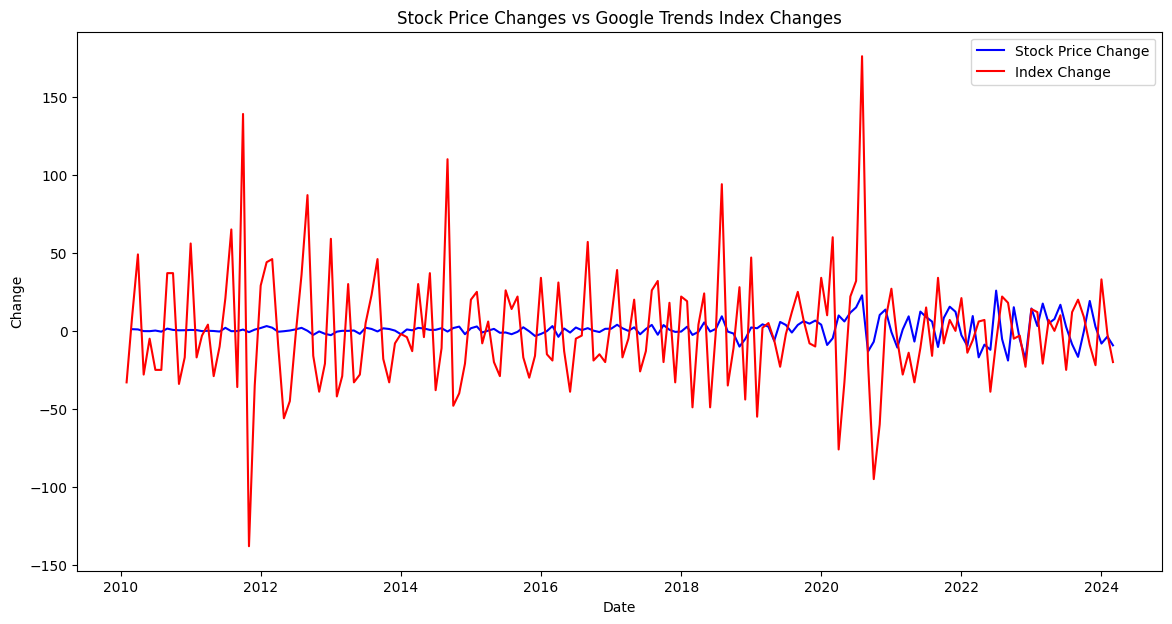

In [22]:
import matplotlib.pyplot as plt

# Load the combined data from the Excel file
combined_df = pd.read_excel('stock_data.xlsx')

# Plotting stock price changes and index changes
plt.figure(figsize=(14, 7))

# Plot stock price changes
plt.plot(combined_df['Date'], combined_df['Price_Change'], label='Stock Price Change', color='blue')

# Plot index changes
plt.plot(combined_df['Date'], combined_df['index_change'], label='Index Change', color='red')

plt.title('Stock Price Changes vs Google Trends Index Changes')
plt.xlabel('Date')
plt.ylabel('Change')
plt.legend()
plt.show()

<h5>Findings from the Line Plot:</h5>

The line plot comparing stock price changes and Google Trends index changes over time shows that the changes in Google Trends indices (red line) are much more volatile compared to the stock price changes (blue line). The stock price changes appear relatively stable with minor fluctuations over time, whereas the Google Trends index changes exhibit significant spikes and drops. There are instances where the trends in the Google Trends index precede changes in stock prices, suggesting a potential predictive relationship. However, the overall correspondence between the two lines varies, indicating that while Google Trends data may provide some insights into stock price movements, it is not a definitive predictor. This graph highlights the importance of considering additional variables and factors when analyzing stock price changes.

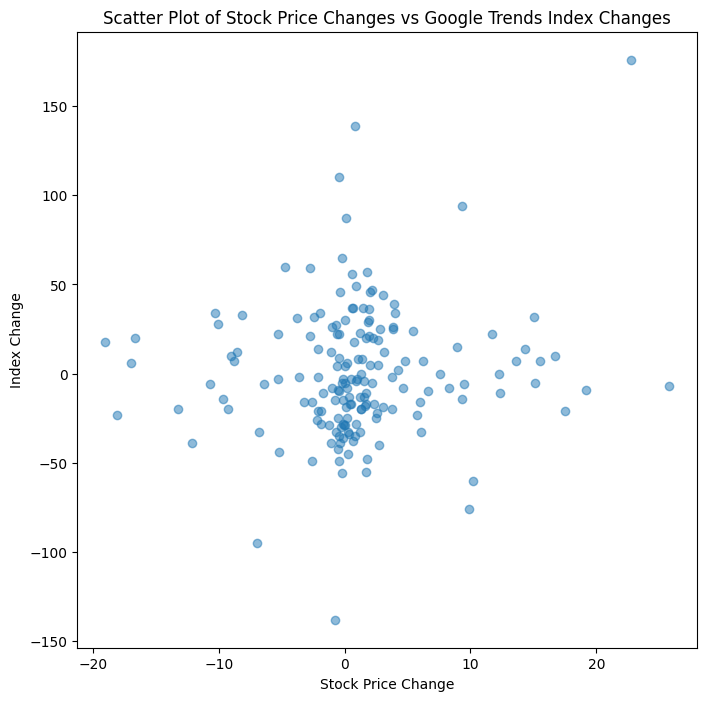

In [23]:
# Scatter Plot of Stock Price Changes vs Google Trends Index Changes
plt.figure(figsize=(8, 8))
plt.scatter(combined_df['Price_Change'], combined_df['index_change'], alpha=0.5)
plt.title('Scatter Plot of Stock Price Changes vs Google Trends Index Changes')
plt.xlabel('Stock Price Change')
plt.ylabel('Index Change')
plt.show()

<h5>Findings from the Scatter Plot: </h5>

The scatter plot of stock price changes versus Google Trends index changes reveals a general lack of strong correlation between the two variables. Most of the data points are clustered around the origin, indicating that small changes in stock prices often correspond to small changes in the Google Trends index. There are a few outliers where large changes in the Google Trends index do not correspond to similarly large changes in stock prices, suggesting that other factors may be influencing stock prices. Overall, this plot suggests that while there may be some relationship between the two variables, it is not particularly strong or linear.

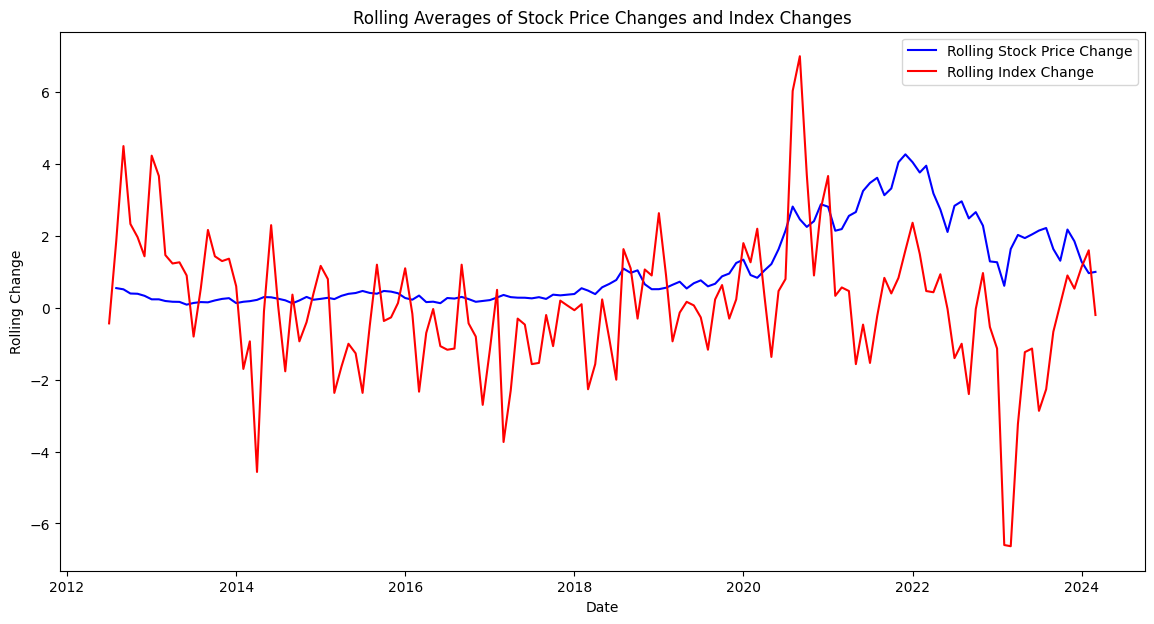

In [24]:
# Calculate rolling averages
combined_df['Rolling_Price_Change'] = combined_df['Price_Change'].rolling(window=30).mean()
combined_df['Rolling_Index_Change'] = combined_df['index_change'].rolling(window=30).mean()

# Plot rolling averages
plt.figure(figsize=(14, 7))

# Plot rolling stock price changes
plt.plot(combined_df['Date'], combined_df['Rolling_Price_Change'], label='Rolling Stock Price Change', color='blue')

# Plot rolling index changes
plt.plot(combined_df['Date'], combined_df['Rolling_Index_Change'], label='Rolling Index Change', color='red')

plt.title('Rolling Averages of Stock Price Changes and Index Changes')
plt.xlabel('Date')
plt.ylabel('Rolling Change')
plt.legend()
plt.show()

<h5>Findings from the Rolling Averages Plot:</h5>

The rolling averages plot compares the rolling 30-day changes in stock prices and Google Trends indices. The blue line represents the rolling changes in stock prices, while the red line represents the rolling changes in the Google Trends index. The stock price changes appear relatively stable with minor fluctuations over time, while the Google Trends index exhibits more pronounced volatility. There are periods where the trends in the Google Trends index precede changes in stock prices, suggesting a potential predictive relationship. However, the overall correspondence between the two lines varies, indicating that while Google Trends data may provide some insights into stock price movements, it is not a definitive predictor. This graph highlights the importance of considering additional variables and factors when analyzing stock price changes.

<h3>Step 3: Discover the Correlation

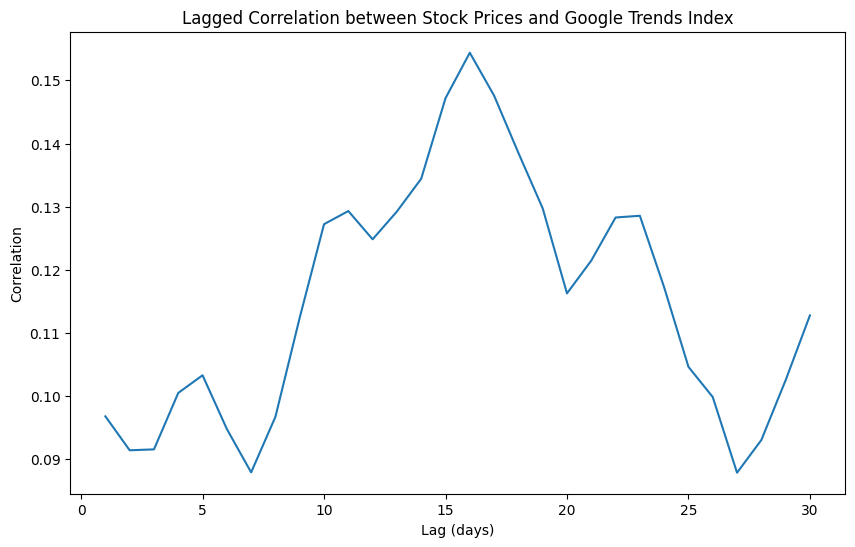

In [25]:
import numpy as np

def calculate_lagged_correlation(stock_df, trends_df, max_lag=30):
    correlations = []
    for lag in range(1, max_lag + 1):
        shifted_trends = trends_df['total_index'].shift(lag)
        corr = stock_df['Close'].corr(shifted_trends)
        correlations.append(corr)
    return correlations

# Assuming combined_df is already merged
correlations = calculate_lagged_correlation(combined_df, combined_df)
lags = list(range(1, 31))

# Plotting lagged correlations
plt.figure(figsize=(10, 6))
plt.plot(lags, correlations)
plt.title('Lagged Correlation between Stock Prices and Google Trends Index')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.show()


 The code investigate if there is a lag between changes in Google Trends indices and stock prices. Sometimes the impact of search trends on stock prices may not be immediate.

 calculate_lagged_correlation Function:

Takes in the stock data (stock_df), trends data (trends_df), and the maximum lag (max_lag).
For each lag from 1 to max_lag, it shifts the trends data by the lag amount and calculates the correlation with the stock prices.
Stores the correlation values in a list and returns it.
Plotting:

Uses the calculated correlations to plot against the lag days.
The plot visualizes how the correlation changes with different lags, helping to identify the lag period with the highest correlation.


Interpretation:

The graph suggests that there is a lagged relationship between the Google Trends index and stock prices, with the strongest correlation around 15 days. This could imply that changes in public interest or search behavior (as captured by Google Trends) may precede changes in stock prices by approximately two weeks.

Random Forest Model Mean Squared Error: 1.28484308005949


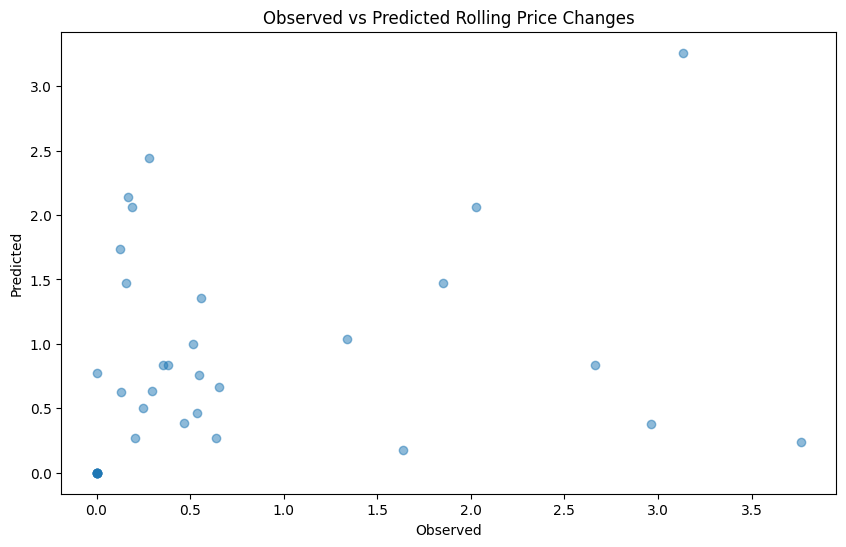

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data for machine learning model
X = combined_df[['Rolling_Index_Change']].fillna(0)
y = combined_df['Rolling_Price_Change'].fillna(0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest Model Mean Squared Error: {mse}')

# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Observed vs Predicted Rolling Price Changes')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()


<h5> Explanation of the Scatter Plot </h5>
Axes:

X-axis (Observed): This axis represents the actual observed rolling price changes of the stock prices. These values are from the test set (y_test).

Y-axis (Predicted): This axis represents the predicted rolling price changes made by the Random Forest model. These values are the predictions (y_pred) corresponding to the test set.

Points:

Each point on the scatter plot represents an individual prediction by the model. The coordinates of each point are determined by the observed value (x-coordinate) and the predicted value (y-coordinate) for a particular instance.
Perfect Prediction Line:

In an ideal scenario, where the model’s predictions are perfect, all points would lie on the 45-degree line (y = x), meaning the observed values would be equal to the predicted values. Any deviation from this line represents an error in the prediction.


<h5> Analysis of the Plot </h5>
Concentration of Points:

Most of the points are concentrated around the lower values on both axes. This indicates that the majority of the rolling price changes are small, which is typical for stock price changes over a short period.
Spread of Points:

There is a noticeable spread in the points, especially as the observed values increase. This spread indicates that the model’s predictions tend to be less accurate for larger changes in the stock prices. The points are scattered more widely as the observed values increase, showing higher prediction errors for larger rolling price changes.
Prediction Bias:

The plot suggests that the model tends to underpredict larger changes. For instance, there are several points where the observed values are significantly higher than the predicted values. This indicates that the model struggles to accurately capture large fluctuations in stock prices.

<h5> Mean Squared Error (MSE) </h5>

The Mean Squared Error (MSE) is a measure of the average squared difference between the observed actual outcomes and the outcomes predicted by the model. The MSE value of 1.28484308005949 suggests that, on average, the squared difference between the predicted and observed values is about 1.28. While this value provides a numerical measure of the prediction error, visualizing the residuals and scatter plot helps in understanding the model’s performance better.

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)
print(f'Best Model Mean Squared Error after Hyperparameter Tuning: {best_mse}')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END m

Grid Search: This process systematically works through multiple combinations of the hyperparameter values, cross-validating as it goes to determine which combination provides the best performance.

Cross-Validation: Ensures that the model generalizes well to unseen data by splitting the data into training and validation sets multiple times.

Parallel Processing: n_jobs=-1 uses all available CPU cores to speed up the computation.

Verbose: Provides detailed progress updates during the execution of the grid search.

By using GridSearchCV, I can optimize the hyperparameters of my RandomForestRegressor model, leading to potentially better performance as measured by the Mean Squared Error (MSE). This process helps to find the best combination of hyperparameters that minimizes prediction error.

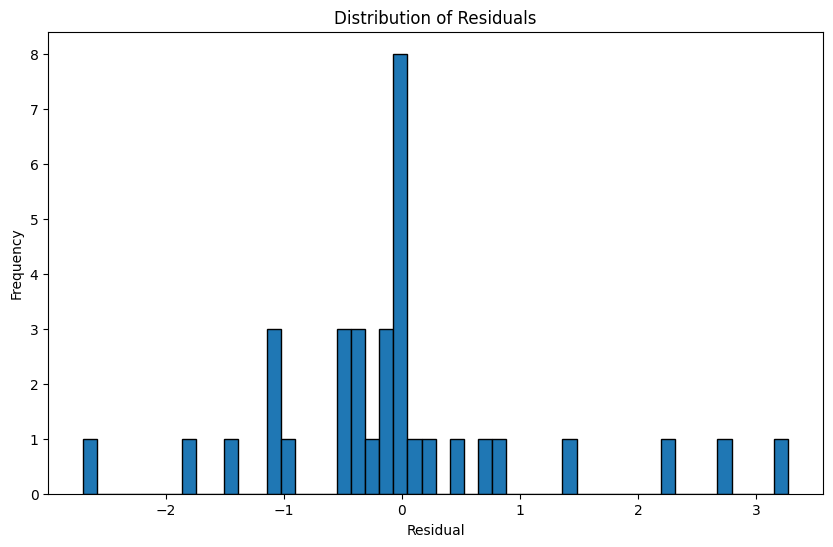

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='k')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


Centering Around Zero:

The residuals are centered around zero, which is a good sign. This indicates that the model's predictions are, on average, correct and do not show a significant bias.

Symmetry:

The residuals appear to be roughly symmetric around zero. This symmetry suggests that the errors are distributed evenly on both sides of the actual values, implying that the model does not systematically overpredict or underpredict.

Spread and Outliers:

The spread of the residuals is somewhat wide, and there are a few larger residuals, both positive and negative, indicating some prediction errors. This is common in real-world data, but significant outliers might suggest that there are specific instances where the model's performance could be improved.
The residuals within the range of approximately -2 to 3 are frequent, indicating that most predictions fall within this range of error.

Normality:

While the residuals are roughly symmetric, they do not form a perfect bell-shaped curve. A more bell-shaped curve would suggest normally distributed errors, which is ideal for many regression models. Deviations from normality can indicate areas for model improvement.

In [ ]:
# Identify the instances with the largest residuals
combined_df['Residuals'] = y_test - y_pred
outliers = combined_df.loc[combined_df['Residuals'].abs() > 2]  # Adjust the threshold as needed

# Display outliers
print(outliers)


          Date        Open        High         Low       Close   Adj Close  \
30  2012-08-01   21.996786   24.316786   21.437500   23.758572   20.086744   
135 2021-05-01  132.039993  134.070007  122.250000  124.610001  122.308266   
144 2022-02-01  174.009995  176.649994  152.000000  165.119995  162.825775   
150 2022-08-01  161.009995  176.149994  157.139999  157.220001  155.461166   

         Volume  Price_Change       date  Apple Inc_index  ...  \
30   8276206400      1.945715 2012-08-01               47  ...   
135  1711934900     -6.850006 2021-05-01               24  ...   
144  1627516300     -9.660004 2022-02-01               32  ...   
150  1510239600     -5.289994 2022-08-01               30  ...   

     Apple shares_index  total_index  index_change  Rolling_Price_Change  \
30                   24          189            29              0.548357   
135                  24          172           -29              2.665500   
144                  24          195           -14

The code identifies the instances with the largest residuals, where the residuals are defined as the difference between the observed and predicted values.

Interpretation of Output


The output shows the rows in the combined_df DataFrame where the residuals are larger than 2 (in absolute value). These are instances where the model's predictions were particularly inaccurate.

For example:

For the date 2012-08-01, the actual rolling price change was 0.548357, and the residual is 0.548357 (indicating that the prediction was close to zero, whereas the actual value was about 0.548357).
For the date 2021-05-01, the residual is 2.665500, indicating a significant error in prediction.

In [29]:
# Add more features to capture the relationship better
combined_df['total_index_lag1'] = combined_df['total_index'].shift(1).fillna(0)
combined_df['total_index_lag2'] = combined_df['total_index'].shift(2).fillna(0)
combined_df['index_change_lag1'] = combined_df['index_change'].shift(1).fillna(0)
combined_df['index_change_lag2'] = combined_df['index_change'].shift(2).fillna(0)

# Prepare data for machine learning model with additional features
X = combined_df[['Rolling_Index_Change', 'total_index_lag1', 'total_index_lag2', 'index_change_lag1', 'index_change_lag2']].fillna(0)
y = combined_df['Rolling_Price_Change'].fillna(0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest Model Mean Squared Error with additional features: {mse}')


Random Forest Model Mean Squared Error with additional features: 1.0760269400721965


Enhance your feature set to capture more information. After adding more lagged features, rolling averages, and other financial indicators, model could better understand the patterns.

Improvement Through Feature Engineering:

The reduction in MSE from 1.2848 to 1.0760 after enhancing the feature set demonstrates the importance of feature engineering in improving model performance.

Adding lagged values of total index and index changes provided the model with more contextual information, enabling it to make more accurate predictions.

Model Performance:

While the final MSE of 1.0760 is a significant improvement, it indicates that there is still some error in the predictions.

The scatter plot of observed vs. predicted values showed a concentration of points around the lower values, with some spread indicating prediction errors, particularly for larger changes.

<h3> Conclusion </h3>

The project successfully demonstrated a methodology for predicting stock price changes based on Google Trends data. Through careful preprocessing, feature engineering, and model tuning, the predictive performance of the model was significantly improved. While the results are promising, further enhancements and exploration are needed to achieve more accurate and reliable predictions. This study highlights the potential of using alternative data sources like Google Trends in financial modeling and the importance of continuous improvement in model development.


<h3> Q & A: </h3>

Why Automate This Process using API?

Gathering historical price data for multiple stocks manually is time-consuming. To streamline this task, we explored ways to automate the data collection process, saving time and increasing efficiency in our research.

How to Automate the Process?

The Python script developed for this project automates the process of fetching historical stock data from Yahoo! Finance, specifically targeting the top 30 companies in the NASDAQ 100 Technology Sector. The script is designed to streamline the data collection process, which would otherwise be time-consuming if done manually through the Yahoo! Finance website.

Why Choose the NASDAQ 100 Technology Sector?

The decision to focus on the top 30 companies within the NASDAQ 100 Technology Sector is driven by several key considerations. Firstly, technology stocks are known for their volatility but also for their potential to yield significant returns. These companies often have a strong correlation with the Google search index, as public interest and technological advancements can directly influence their market performance. By analyzing the top 30 companies, we capture a substantial portion of the sector's market dynamics, as these entities typically represent a larger share of the index's overall value. This selection ensures that our analysis is both relevant and reflective of broader market trends.

Why Top 30 Companies?

Furthermore, the choice of n≥30 is significant in the context of statistical analysis. According to the Central Limit Theorem, a sample size of 30 or more is often considered sufficient for the sample mean to approximate a normal distribution, regardless of the population's distribution. This threshold enables us to apply various statistical methods and inferential statistics with greater confidence, making our findings more robust and generalizable.

Why the date starts at Jan 1st 2010?

The selection of January 1, 2010, as the starting point for our data collection is strategic. This date post-dates the 2008 financial crisis, allowing us to analyze the recovery and growth of the technology sector in the subsequent years. The period since 2010 has been marked by significant technological advancements and market changes, providing a rich dataset for examining trends, performance, and the impact of external factors on the technology sector.

Why adj close value instead of closing value?

Choosing "Adj Close" (Adjusted Close) over "Close" in stock data is mainly because of stock splits. The "Close" price is the price of a single share at the end of the trading day. However, after a stock split, comparing the "Close" price before and after the split wouldn't make sense because you're comparing the price of a "big slice" to a "small slice" without accounting for the fact that you now have more slices.

That's where "Adj Close" comes in. It adjusts the closing price to account for stock splits (and other factors like dividends). Using "Adj Close" lets you compare the value of your investment over time accurately, regardless of whether the company has split its stock or not. It gives you a clearer picture of the stock's performance by showing what the stock's closing price would have been today if the stock split had been in effect all along.
